# CommentScraper

In [6]:
import requests
import re
import json
from bs4 import BeautifulSoup
from collatex import *
from sklearn import tree

In [7]:
list_of_url = [
            "https://www.espn.com/soccer/commentary?gameId=541728",
            "https://www.espn.com/soccer/commentary?gameId=541726",
            "https://www.espn.com/soccer/commentary?gameId=541731",
            "https://www.espn.com/soccer/commentary?gameId=541748",
            "https://www.espn.com/soccer/commentary?gameId=541738",
            "https://www.espn.com/soccer/commentary?gameId=541736",
            "https://www.espn.com/soccer/commentary?gameId=541741"
        ]
for url in list_of_url:
        response = requests.get(url)
        if response.status_code != 200:
            raise Exception('Sites are not reachable')

# Produce JSON
A json file with comments in urls.
The following format is needed by collatex library.

In [8]:
comments_dict = {}
comments_dict["witnesses"] = []
id = 0
for url in list_of_url:
    print("...Processing:", url)
    website = requests.get(url)
    soup = BeautifulSoup(website.text, "html.parser")
    container = soup.find('div', {"id": "match-commentary-1-tab-1"})
    for td in container.find_all('td', {"class": "game-details"}):
        comment_cleaned = re.sub("\t", "", re.sub("\n", "", td.text))[4:-8]
        comments_dict["witnesses"].append({'id': str(id), 'content': comment_cleaned})
        id += 1
print("Processing completed")
        
json_file_name = "comments.json"
with open(json_file_name, "w+") as out_file:
    json.dump(comments_dict, out_file, indent=4)

...Processing: https://www.espn.com/soccer/commentary?gameId=541728
...Processing: https://www.espn.com/soccer/commentary?gameId=541726
...Processing: https://www.espn.com/soccer/commentary?gameId=541731
...Processing: https://www.espn.com/soccer/commentary?gameId=541748
...Processing: https://www.espn.com/soccer/commentary?gameId=541738
...Processing: https://www.espn.com/soccer/commentary?gameId=541736
...Processing: https://www.espn.com/soccer/commentary?gameId=541741
Processing completed


# Comment extractor
A extractor by keywords, with distribution

In [21]:
with open(json_file_name, "r+") as in_file:
    data = json.load(in_file)

keywords = ["foul", "pass", "goal", "shot", "kick", "card", "Attempt", "corner"]

grouped_lists = {k:[] for k in keywords}

for key in keywords:
    key_list = []
    for element in data["witnesses"]:
        if key in element["content"]:
            key_list.append(element)
    grouped_lists[key] = key_list
    print("Key:",key,len(grouped_lists[key])/(len(data["witnesses"])), "N.:",len(grouped_lists[key]))  

Key: foul 0.036827195467422094 N.: 26
Key: pass 0.009915014164305949 N.: 7
Key: goal 0.046742209631728045 N.: 33
Key: shot 0.23087818696883852 N.: 163
Key: kick 0.1954674220963173 N.: 138
Key: card 0.043909348441926344 N.: 31
Key: Attempt 0.24362606232294617 N.: 172
Key: corner 0.0821529745042493 N.: 58


# Collatex Visualization
A collatex representation of comments in resulting json file, passed grouped by keyword


(dot.exe:8272): Pango-WARNING **: couldn't load font "Bukyvede Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


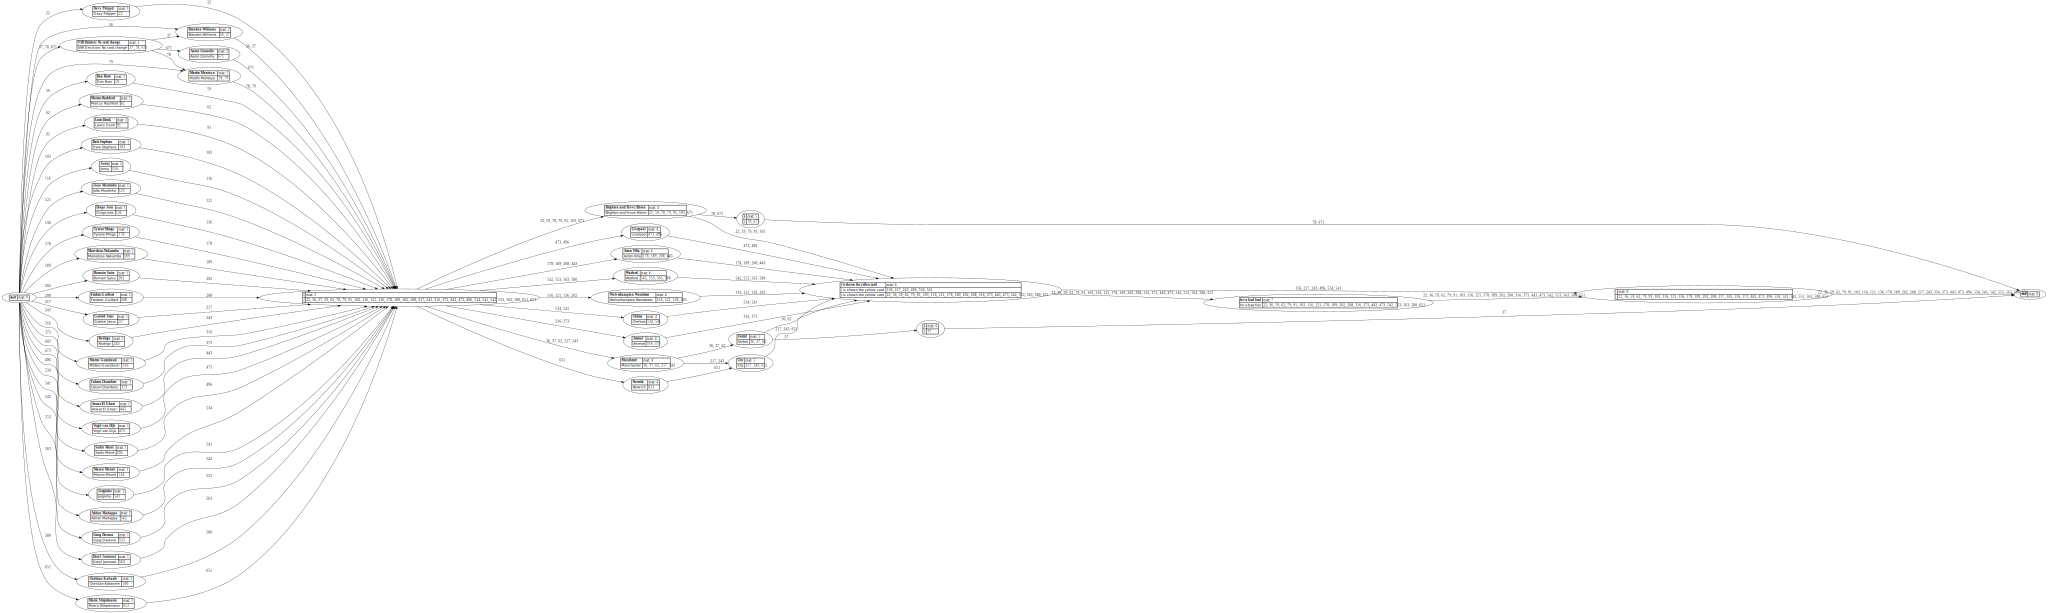

In [24]:
collation = Collation()
for element in grouped_lists["card"]:
    collation.add_plain_witness(element["id"], element["content"])

collate(collation, output="svg")

In [28]:
names = []
for element in data["witnesses"]:
        try:
            res = element["content"].split("(")[1].split(")")[0]
            names.append(res)
        except IndexError:
            pass
set(names)

{'Arsenal',
 'Aston Villa',
 'Brighton and Hove Albion',
 'Chelsea',
 'Crystal Palace',
 'Liverpool',
 'Manchester City',
 'Manchester United',
 'Norwich City',
 'Scott McTominay',
 'Trézéguet',
 'Watford',
 'Wolverhampton Wanderers'}

In [ ]:
print(names)